In [434]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import random as rnd
import time
from copy import deepcopy

%matplotlib inline

In [762]:
class Point():
    def __init__(self, x,y):
        self.x = x
        self.y = y
    def angle(self, p):
        try:
            return np.angle((p.x-self.x)+1j*(p.y-self.y))
        except:
            print("error in Point()",p, self)
            return np.angle((p.x-self.x)+1j*(p.y-self.y))
    def distance(self, p):
        return np.sqrt((self.x-p.x)**2 + (self.y-p.y)**2)
    def same_side_of_as(self,l, p):
        r_self = l.a*self.x +l.b*self.y +l.c
        r_p = l.a*p.x +l.b*p.y +l.c
        if r_self*r_p > 0:
            return True
        else:
            return False
    def draw(self, ax, **kwargs):
        ax.scatter([self.x],[self.y], **kwargs)
    def __repr__(self):
        return "("+str(self.x)+", "+str(self.y)+")"

In [763]:
class Line():
    def __init__(self, ):
        self.a = self.b = self.c = 1
    def from_param(self,a,b,c):
        if not((a==0 and b==0)):
            self.a = a
            self.b = b
            self.c = c
    def from_points(self, A,B):
        if not (A.x==B.x and A.y==B.y):
            if A.y==B.y:
                self.a=0
                self.c=A.y
                self.b=1
            else:
                self.a = 1
                self.b = -(A.x-B.x)/(A.y-B.y)
                self.c = 0 - (A.x + self.b*A.y)
        else:
            print("Line Error: Same points", A, B)
            return False
    def from_pointsbetween(self, A, B):
        x1, y1 = A.x, A.y
        x2, y2 = B.x, B.y
        self.a = -2*(x1-x2)
        self.b = -2*(y1-y2)
        self.c = (x1**2-x2**2)+(y1**2-y2**2)
    def intersection(self, l):
        if (self.a * l.b == self.b * l.a):
            return "parallel"
        else:
            solution = np.linalg.solve(np.matrix([[self.a,self.b],[l.a,l.b]]), -np.matrix([[self.c],[l.c]]))
            r = Point(solution[0,0], solution[1,0])
            return r
    #def simmetric_point(self, p):
      
    def f(self, x):
        if self.b!=0:
            return -(x*self.a+self.c)/self.b
        else:
            return None
    def draw(self, ax, rang, **kwargs):
        ax.plot(rang, [self.f(x) for x in rang], **kwargs)

In [830]:
class Poligon():
    def __init__(self, p):
        self.p=p
        self.dots = []
        self.lines = []
        self.dot_names = []
    def load_dots(self, dots, dot_names):
        for dot, name in zip(dots, dot_names):
            self.dots.append(deepcopy(dot))
            self.dot_names.append(deepcopy(name))
        
        self.dots, self.dot_names =  zip(*sorted(zip(self.dots, self.dot_names), 
                                                    key = lambda var: self.p.angle(var[0])))
        self.dots = list(self.dots)
        self.dot_names = list(self.dot_names)
    """       except:
            for i in self.dots:
                print("Error in Poligon: ",i)
            self.dots =  sorted(self.dots, key = lambda var: self.p.angle(var))
    """   
    def produce_lines_from_dots(self): 
        self.lines.clear()
        for dot in self.dots:
            self.lines.append(Line())
            self.lines[-1].from_pointsbetween(self.p, dot)
    def kick_redundant_dots_lines(self):
        redundant_list = []
        i = 0
        while i< len(self.dots):
            redundant = True
            for j in range(len(self.dots)):
                if j!=i:
                    intersection = self.lines[i].intersection(self.lines[j])
                    intersection_good = True
                    k=0
                    while k < len(self.dots) and intersection_good:
                        if k !=i and k!=j:
                            if not intersection.same_side_of_as(self.lines[k], self.p):
                                intersection_good=False
                        k+=1
                    if intersection_good:
                        redundant=False
            if redundant:    
                redundant_list.append(self.dot_names[i])
                del self.lines[i]
                del self.dot_names[i] 
                del self.dots[i]
                
            else:
                i+=1
        return redundant_list
                

-1.78165004114
0.957038124995
0.306348009074
-1.2777395363
-0.184904224007
2.39051752334
-0.704534959601
-2.08064568125
2.45196897418
1.49624341528


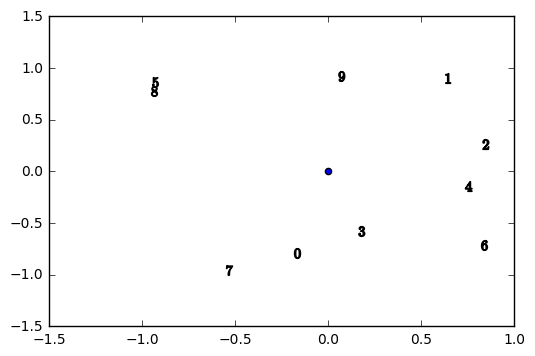

In [783]:
pentagon = Poligon(Point(0,0))
dots = [Point(np.random.random()*2-1,np.random.random()*2-1) for i in range(10)]
fig, ax = plt.subplots()
pentagon.p.draw(ax)
for i, dot in enumerate(dots):
    dot.draw(ax, marker = r"$"+str(i)+r"$", s = 50)
    print(pentagon.p.angle(dot))
plt.show()

In [784]:
pentagon.load_dots(dots, list(range(10)))

TypeError: zip() does not take keyword arguments

-1.78165004114
0.957038124995
0.306348009074
-1.2777395363
-0.184904224007
2.39051752334
-0.704534959601
-2.08064568125
2.45196897418
1.49624341528


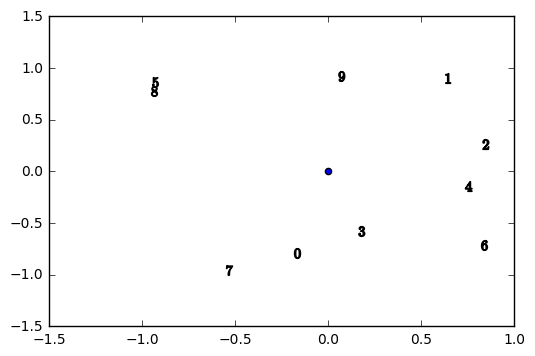

In [785]:
fig, ax = plt.subplots()
pentagon.p.draw(ax)
for i, dot in enumerate(pentagon.dots):
    dot.draw(ax, marker = r"$"+str(i)+r"$", s = 50)
    print(pentagon.p.angle(dot))
plt.show()

In [768]:
pentagon.produce_lines_from_dots()


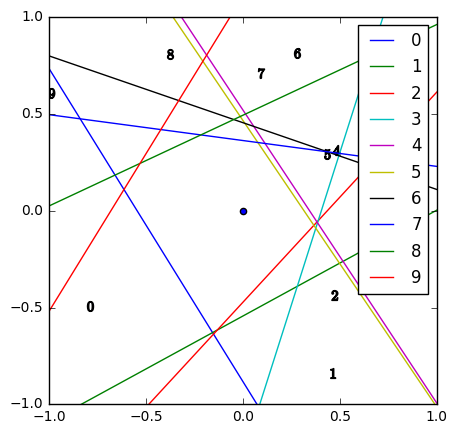

In [769]:
fig, ax = plt.subplots(figsize=(5,5))
pentagon.p.draw(ax)
for i,(dot, line, name) in enumerate(zip(pentagon.dots,pentagon.lines, pentagon.dot_names)):
    dot.draw(ax, marker = r"$"+str(name)+r"$", s = 50)
    line.draw(ax, (-1,1), label = str(name))
plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

In [770]:
pentagon.kick_redundant_dots_lines()

[3, 5, 8]

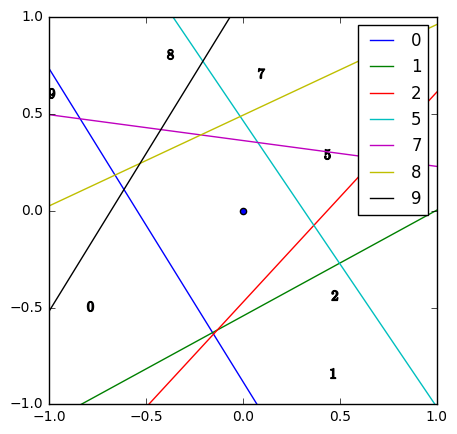

In [771]:
fig, ax = plt.subplots(figsize=(5,5))
pentagon.p.draw(ax)
for i,(dot, line, name) in enumerate(zip(pentagon.dots,pentagon.lines, pentagon.dot_names)):
    dot.draw(ax, marker = r"$"+str(name)+r"$", s = 50)
    line.draw(ax, (-1,1), label = str(name))
plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

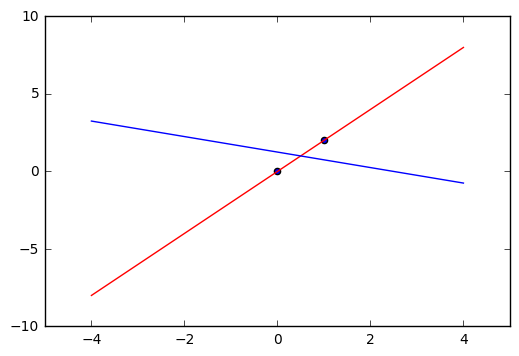

In [772]:
A = Point(0,0)
B = Point(1,2)
l1 = Line()
l1.from_points(A,B)
l2 = Line()
l2.from_pointsbetween(A,B)
fig, ax = plt.subplots()
A.draw(ax)
B.draw(ax)
l1.draw(ax, (-4,4), c ="r")
l2.draw(ax, (-4,4))

In [773]:

   
    """def __hash__(self):
        return self.id_n
    def __cmp__(self, p):
        if self.id_n < p.id_n: return -1
        elif self.id_n == p.id_n: return 0
        else: return 1
    def __eq__(self, p):
        if p.id_n == self.id_n: return True
        else: return False
    def __repr__(self):
        return str(self.id_n) """

IndentationError: unexpected indent (<ipython-input-773-774b264cb615>, line 3)

In [774]:

 
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
 
def find_centers(X, K,iter_max = 1):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    iter = 0
    while (not has_converged(mu, oldmu)) and (iter<iter_max):
        iter +=1
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    #print(iter)
    return(mu, clusters)

    

In [74]:
%timeit
M = 1000
N = M*10

points = list(np.random.random(size = (N,2)))
cp = find_centers(points, M)  #np.random.random(size = (N,2)))


1


In [72]:
p_next = cp[0]
#[cp[0][k][0] for k in cp.keys()]
p_next

[array([ 0.91999666,  0.80682831]),
 array([ 0.81640893,  0.26371389]),
 array([ 0.83837211,  0.16898142]),
 array([ 0.9548587 ,  0.46289558]),
 array([ 0.18330741,  0.6600585 ]),
 array([ 0.32816634,  0.77657066]),
 array([ 0.12853371,  0.08197629]),
 array([ 0.42287676,  0.40612136]),
 array([ 0.18795711,  0.72601536]),
 array([ 0.78579225,  0.90335931]),
 array([ 0.07209599,  0.29427407]),
 array([ 0.48662455,  0.71025474]),
 array([ 0.70609887,  0.55292922]),
 array([ 0.97735315,  0.17067132]),
 array([ 0.36785569,  0.21822576]),
 array([ 0.54504293,  0.36421105]),
 array([ 0.20941454,  0.84132383]),
 array([ 0.74973332,  0.16436924]),
 array([ 0.62262565,  0.08430384]),
 array([ 0.26727678,  0.53113034]),
 array([ 0.33503268,  0.66519084]),
 array([ 0.05387129,  0.22985338]),
 array([ 0.36154743,  0.83671274]),
 array([ 0.68525539,  0.76105432]),
 array([ 0.99064684,  0.70684424]),
 array([ 0.91101834,  0.73915518]),
 array([ 0.08252928,  0.50814655]),
 array([ 0.08386137,  0.7723

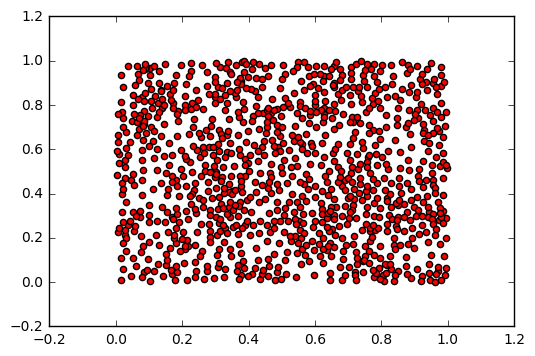

In [73]:
#plt.scatter([p[0] for p in points], [p[1] for p in points], c = "k")
plt.scatter([p[0] for p in p_next], [p[1] for p in p_next], c = "r")
plt.show()

distance = 1
distance_sigma = 1
angle_sigma = 1000
h_sigma = 0.1
Moj_Svet = svet(1, distance, distance_sigma, angle_sigma, h_sigma)

for i in range(100):
    Moj_Svet.add_rnd_node()
    #for j in range(10):
    #    Moj_Svet.push(0.01)

Moj_Svet.draw()

#time.sleep(1)

#Moj_Svet.push(0.1)
#Moj_Svet.reconnect(0)
Moj_Svet.reconnect_all()
xlim =(-10,10)
ylim=(-10,10)
Moj_Svet.draw(xlim,ylim)

for k in nx.all_neighbors(Moj_Svet.G,0):
    print(k)

for i in range(10):
    Moj_Svet.reconnect_all()
    for j in range(10):
        Moj_Svet.push(1)
xlim =(-5,5)
ylim=(-5,5)
Moj_Svet.draw(xlim,ylim)


#time.sleep(1)

i=0
j=9
d  = Moj_Svet.p[i].distance(Moj_Svet.p[j])
f = Moj_Svet.force(d)
print(d,f)

cos = (Moj_Svet.p[i].x - Moj_Svet.p[j].x)/d
sin = (Moj_Svet.p[i].y - Moj_Svet.p[j].y)/d
print(cos, sin)
dx_i = 1 * cos * f
dy_i = 1 * sin * f
print(dx_i, dy_i)

Moj_Svet.push(1)
Moj_Svet.draw(4)
Moj_Svet.p[0].x

In [ ]:
G = nx.Graph()
G.add_node(point(0,1,0,0,0))
mynodes = list(G.nodes())
mynodes[0].x = 2
G["0"]
Can you also make clear which option did you use? the one where you put an object as a node, right? If so, 

G = nx.path_graph(5)

nx.draw(G)

N = 1000
x, y = 10000, 10000
plt.scatter([rnd.uniform(-x, x) for i in range(N)],[rnd.uniform(-y,y) for i in range(N)])
plt.show()

D = {}
D[1] = 12
D[5] = 7

In [627]:
poli= Poligon(A)
poli.

In [849]:
class structure():
    def __init__(self, n_nodes, xlim, ylim, h_sigma, n_sec_max = 100, multiplier=10):
        if n_nodes<10:
            return "error, n_nodes<1"
        self.xlim = xlim
        self.ylim = ylim
        self.n_nodes = n_nodes
        self.G = nx.Graph()
        self.p=[]
        self.make_points(n_sec_max=n_sec_max, multiplier = 10)
        self.boundary_nodes = [0]
        self.max_no_edges = 10
        #self.distance = distance
        self.h_sigma = h_sigma
        
    def make_points(self, n_sec_max=100, multiplier =10):
        p=[]
        sections = 1
        not_enough = True
        while not_enough:
            if self.n_nodes/sections**2<n_sec_max:
                not_enough = False
            else:
                sections+=1
        n_per_section = int(self.n_nodes/sections**2)
        for i in range(sections):
            y_lim = (self.ylim[0]+i/sections*(self.ylim[1]-self.ylim[0]),
                     self.ylim[0]+(i+1)/sections*(self.ylim[1]-self.ylim[0]))
            for j in range(sections):
                x_lim = (self.xlim[0]+j/sections*(self.xlim[1]-self.xlim[0]),
                         self.xlim[0]+(j+1)/sections*(self.xlim[1]-self.xlim[0]))
                
                points = np.random.random(size = (n_per_section*multiplier,2))
                points = [ np.array([x_lim[0]+ a*(x_lim[1]-x_lim[0]), y_lim[0]+ b*(y_lim[1]-y_lim[0])]) for a,b in points]
                cp = find_centers(points, n_per_section, iter_max=2)  #np.random.random(size = (N,2)))
                p = p + cp[0]
        print("Number of points:", len(p))
        self.n_nodes = len(p)
        for id_n,point in enumerate(p):
            self.p.append(Point(point[0], point[1]))
            
    def make_graph(self):
        self.G = nx.path_graph(self.n_nodes)
        
    def find_closest_inside_graph(self, other_than):
        if len(list((self.G.nodes())))>0:
            minj = np.random.choice(list(self.G.nodes()))
            while minj in other_than:
                minj = np.random.choice(list(self.G.nodes()))
        else:
            self.G.add_node(0)
            minj=0
        
        for j, pj in enumerate(self.p):
            if (j in self.G.nodes()) and (j not in other_than):
                if self.p[i].distance(self.p[j])<self.p[i].distance(self.p[minj]):
                    minj = j
        return minj

    def draw_points(self):
        fig,ax = plt.subplots(figsize =(10,10))
        plt.scatter([p.x for p in self.p],[p.y for p in self.p])
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)
    def draw_graph(self):
        pos = {node:(self.p[node].x,self.p[node].y) for node in self.G.nodes()}
        color = [0 if i in self.boundary_nodes else 1 for i in self.G.nodes() ]
        
        fig,ax = plt.subplots(figsize =(10,10))
        nx.draw_networkx(self.G, 
                         pos = pos,
                         node_color = color, 
                         node_size = 20,
                         with_labels= False)
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)
        plt.show()
        
    def reconnect_all(self):
        for i in self.G.nodes():
            self.reconnect(i)
    
    
    def reconnect(self,new_node_id):
        close_nodes=[]
        for e in nx.dfs_edges(self.G, source= new_node_id, depth_limit = 4):
            close_nodes.append(e[1])
        d = []
        for close_node in close_nodes:
            d_i = self.p[new_node_id].distance(self.p[close_node])
            d.append(d_i)
            d.sort()
            if len(d)>self.max_no_edges:
                d = d[:self.max_no_edges]
        
        for close_node in close_nodes:
            if self.p[close_node].distance(self.p[new_node_id])<=d[-1]:
                if not close_node in nx.all_neighbors(self.G, new_node_id):
                    self.G.add_edge(close_node, new_node_id)
                    self.reconnect(close_node)
            else:
                if close_node in nx.all_neighbors(self.G, new_node_id):
                    self.G.remove_edge(close_node, new_node_id)
        self.boundary_nodes.append(new_node_id)
        
    def reconnect_spatially(self, i):
        """neighbours_d = [self.p[i].distance(self.p[j]) for j in nx.all_neighbors(self.G, i)]
        if neighbours_d!=[]:
            d= max(neighbours_d)
            for j, pj in enumerate(self.p):
                if self.p[i].distance(self.p[j])<d:
                    self.G.add_edge(i,j)
            self.reconnect(i)
        else: #its a solo point:
            self.G.remove_node(i)
            j = self.find_closest_inside_graph()
            self.G.add_edge(i,j)
            self.reconnect(i)
        """
        neighbours = list(nx.all_neighbors(self.G, i))
        if neighbours!=[]:
            for j in neighbours:
                self.G.remove_edge(i,j)
        #its a solo point:
        other_than = [i]
        for junk in range(5):
            j = self.find_closest_inside_graph(other_than)
            other_than.append(j)
            
        for j in other_than[1:]:
            self.G.add_edge(i,j)
        self.reconnect(i)
        
    def reconnect_properly(self, i,  pool):
        points = []
        for cn in pool:
            points.append(self.p[cn])
        poli = Poligon(self.p[i])
        
        poli.load_dots(points, pool)
        poli.produce_lines_from_dots()
        
        redundant_names = poli.kick_redundant_dots_lines()
        
        for j in pool:    
            if j in redundant_names:
                self.G.add_edge(i,j)
                self.G.remove_edge(i, j)
            else:
                self.G.add_edge(i, j)
    
    def reconnect_all_properly(self):
        for i in self.G.nodes():
            close_nodes=[]
            for e in nx.dfs_edges(self.G, source= i, depth_limit = 4):
                close_nodes.append(e[1])
            self.reconnect_properly(i,close_nodes)
            
    """def still_boundary(self, node_id):
        if node_id not in self.boundary_nodes:
            if nx.degree(self.G, node_id)>5:
                return False
            else:
                self.boundary_nodes.append(node_id)
                return True
        elif nx.degree(self.G, node_id)>5:
            self.boundary_nodes.remove(node_id)
            return False
        else:
            return True"""
    """
    def dxdy(self,i):
        #force from edges
        x = self.p[i].x
        y = self.p[i].y
        dx = 0
        dy = 0
        
        if x>self.xlim[1]:
            dx += (self.xlim[1]-x)**2
        elif x<self.xlim[0]:
            dx += (x-self.xlim[0])**2
        
        if y>self.ylim[1]:
            dy += (self.ylim[1]-y)**2
        elif y<self.ylim[0]:
            dy += (y-self.ylim[0])**2
        #force from graph
        for j in nx.all_neighbors(self.G, i):
            d=self.p[i].distance(self.p[j])
            cos = (self.p[i].x - self.p[j].x)/d
            sin = (self.p[i].y - self.p[j].y)/d
            if d>
            
        return dx,dy"""

Number of points: 198


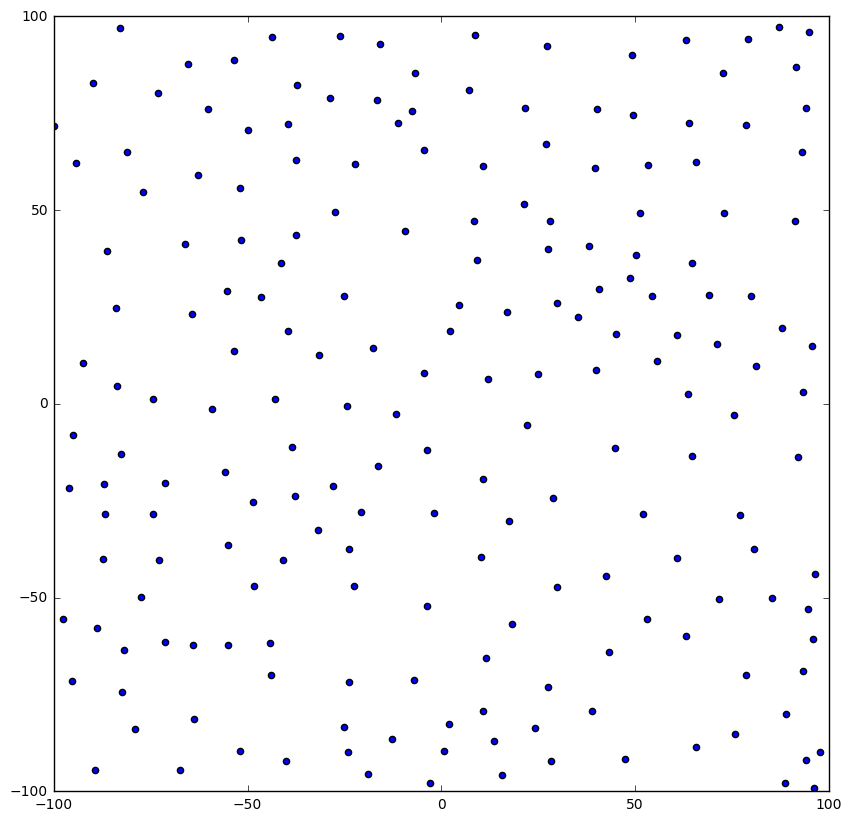

In [850]:
xlim = (-100,100)
ylim = (-100,100)
s = structure(200, xlim,ylim, 1, n_sec_max=50, multiplier=3)
s.draw_points()

In [851]:
s.make_graph()

In [857]:
for i in range(s.n_nodes):
    s.reconnect_spatially(i)

In [841]:
#s.reconnect_all()

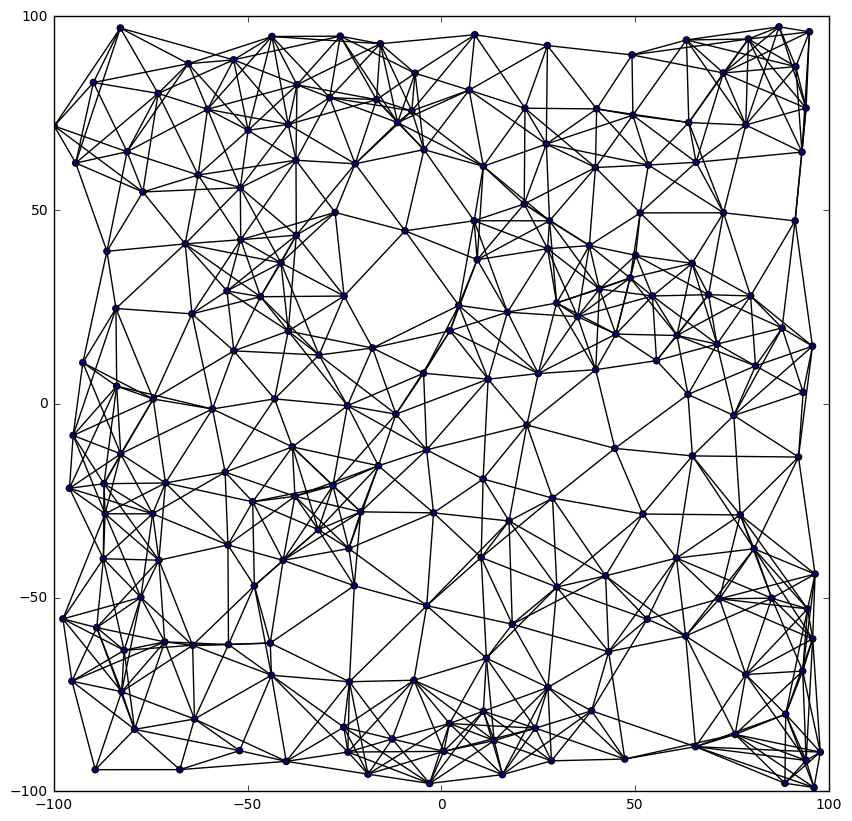

In [858]:
s.draw_graph()

In [860]:
s.reconnect_all_properly()

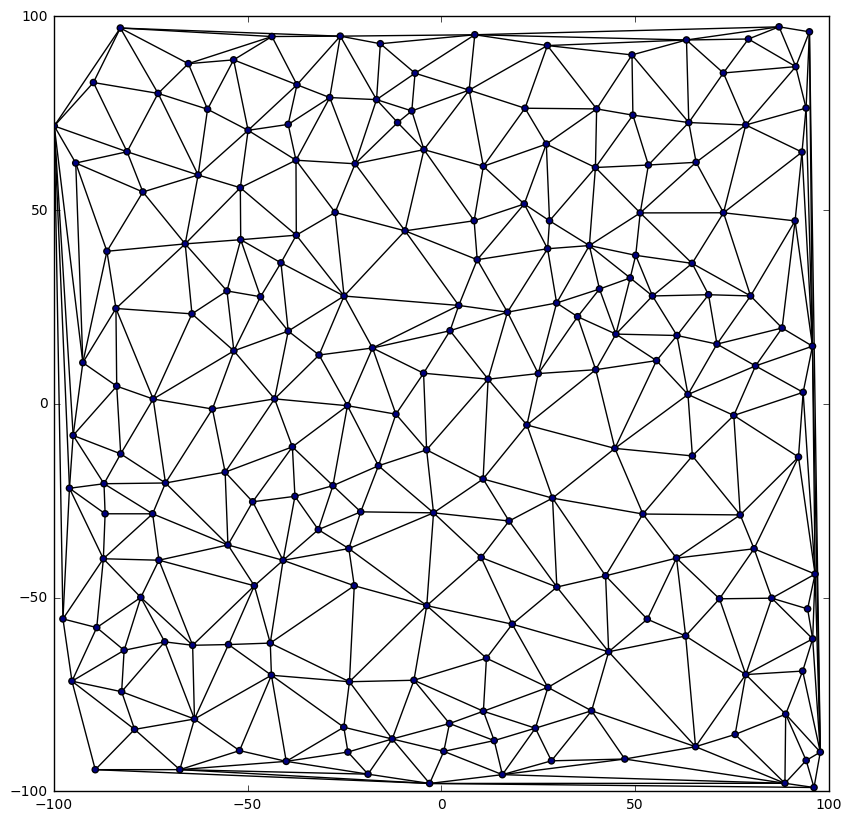

In [861]:
s.draw_graph()
